# k-Nearest Neighbors, Train vs. Test Error, and Bias vs. Variance

In this notebook, we will demonstrate:
1. How to fit a $k$-nearest neighbors ($k$-NN) model
2. The difference between train error and test error
3. How test error decomposes into bias and variance

## Generate data from our model

Throughout this notebook, we will assume that we have a model given by a 3rd-order polynomial:

$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \varepsilon, ~~ \varepsilon \sim \text{N}(0, \sigma^2).$$

We first simulate the 3rd-order polynomial model, to generate our dataset.

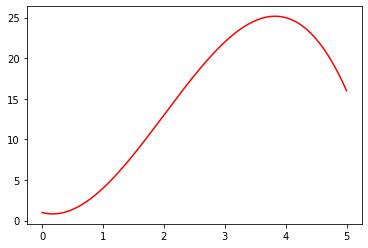

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Polynomial coefficients
beta0 = 1
beta1 = -2
beta2 = 6
beta3 = -1

# Standard deviation of epsilon (noise)
sigma = 2

# Other parameters that we will use throughout
x_min = 0
x_max = 5

# Define our polynomial
def p(x):
    return beta0 + beta1 * x + beta2 * x**2 + beta3 * x**3

# Define a plotting function, for convenience
def plot(f, x_min, x_max, color = 'red', n_points = 1000):
    x = np.linspace(x_min, x_max, n_points).reshape(-1,1)
    y = f(x)
    plt.plot(x,y, color = color)
    
plot(p, x_min, x_max)

We generate a dataset, then split it into train and test sets.

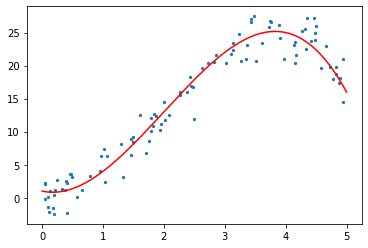

In [11]:
# Convenience function to sample from a given function f
def sample(f, n, sigma, x_min = 0, x_max = 1, seed = None):    
    np.random.seed(seed)
    X   = np.random.uniform(x_min, x_max, size = (n,1))
    eps = np.random.normal(0, sigma, size = (n,1))
    y = f(X) + eps
    return X, y

# Generate dataset and plot datapoints
X, y = sample(p, 100, sigma, x_min, x_max, seed = 2022)
plt.scatter(X,y, s = 5)
plot(p, x_min, x_max)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
X_train.shape

(70, 1)

In [9]:
X_test.shape

(30, 1)

## Train $k$-Nearest Neighbours

Using our training datset, we can train a $k$-nearest neighbours model. Let's start with $k$ = 1.

In [12]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

Every trained sklearn model has a ```predict``` function. 

Let's use our ```plot``` function to plot the predictions of our trained model, superimposed over our training data.

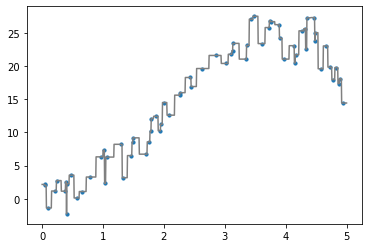

In [13]:
plt.scatter(X_train, y_train, s = 10)
plot(knn.predict, x_min, x_max, color = 'grey')

Our model fits our training data perfectly, but this isn't necesarilty a good thing.

Let's try other values of $k$.

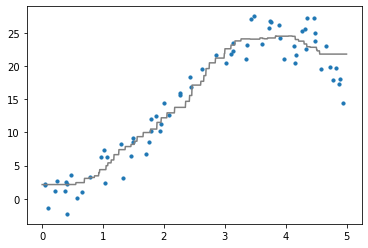

In [16]:
k = 15

knn = KNeighborsRegressor(n_neighbors = k)
knn.fit(X_train, y_train)

plt.scatter(X_train, y_train, s = 10)
plot(knn.predict, x_min, x_max, color = 'grey')

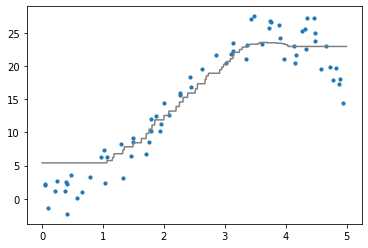

In [9]:
k = 30

knn = KNeighborsRegressor(n_neighbors = k)
knn.fit(X_train, y_train)

plt.scatter(X_train, y_train, s = 10)
plot(knn.predict, x_min, x_max, color = 'grey')

## Compute Train and Test Error

In [10]:
from sklearn.metrics import mean_squared_error 

# Convenience function to fit k-NN and compute train and test errors
def knn_mse(k, X_train, y_train, X_test, y_test, print_output = False):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)

    # Training MSE
    mse_train = mean_squared_error(y_train, knn.predict(X_train))

    # Test MSE
    mse_test  = mean_squared_error(y_test, knn.predict(X_test))

    if print_output:
        print(f'k = {k}')
        print(f'Train MSE: {mse_train}')
        print(f'Test  MSE: {mse_test}')
    
    return mse_train, mse_test
    
knn_mse(1, X_train, y_train, X_test, y_test, print_output = True)

k = 1
Train MSE: 0.0
Test  MSE: 7.872198211234595


(0.0, 7.872198211234595)

In [11]:
knn_mse(15, X_train, y_train, X_test, y_test, print_output = True)

k = 15
Train MSE: 5.6114622870224515
Test  MSE: 5.547848720022162


(5.6114622870224515, 5.547848720022162)

In [11]:
knn_mse(50, X_train, y_train, X_test, y_test, print_output = True)

k = 50
Train MSE: 36.912263148964676
Test  MSE: 55.518837640848886


(36.912263148964676, 55.518837640848886)

Let's repeat this for a range of values of $k$ and plot the train and test MSEs.

In [12]:
k_range = range(1,31)
mse_df = pd.DataFrame(index = k_range, columns = ['Train', 'Test'])

for k in k_range:
    mse_train, mse_test = knn_mse(k, X_train, y_train, X_test, y_test)
    mse_df['Train'][k] = mse_train
    mse_df['Test'][k] = mse_test

mse_df

,Train,Test
1,0.0,7.872198
2,1.573811,6.771593
3,2.47235,5.795224
4,2.944783,5.376236
5,3.163189,5.129518
6,3.187444,5.20438
7,3.039649,5.028385
8,2.987758,4.13933
9,3.212536,4.446781
10,3.764816,4.447365


<AxesSubplot:>

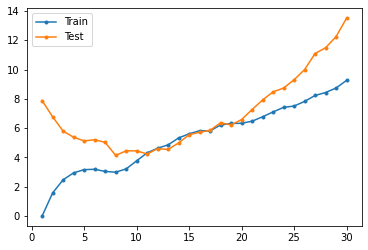

In [13]:
mse_df.plot(marker = '.')

## Compute Bias and Variance

Our results above were all based on one dataset. If we repeat this on another dataset, we'll get different results.

Let's try 10 different datasets and see how our models vary.

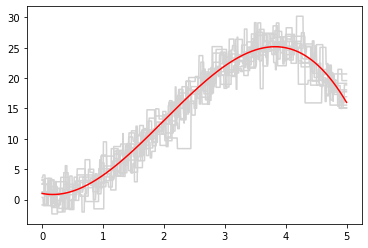

In [14]:
k = 1

for i in range(10):
    X, y = sample(p, 100, sigma, x_min, x_max)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)

    plot(knn.predict, x_min, x_max, color = 'lightgrey')

plot(p, x_min, x_max)

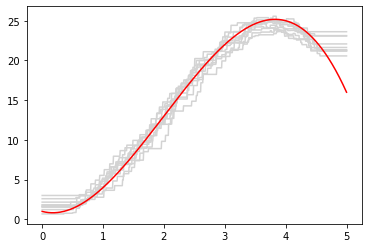

In [15]:
k = 15

for i in range(10):
    X, y = sample(p, 100, sigma, x_min, x_max)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)

    plot(knn.predict, x_min, x_max, color = 'lightgrey')

plot(p, x_min, x_max)

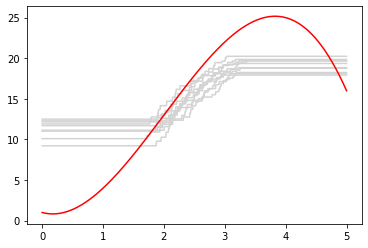

In [27]:
k = 50

for i in range(10):
    X, y = sample(p, 100, sigma, x_min, x_max)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)

    plot(knn.predict, x_min, x_max, color = 'lightgrey')

plot(p, x_min, x_max)

The graphs above give you a sense of the bias and variance of each model.

The following code computes the (test) MSE across 50 datasets and decomposes it into bias, variance, and irreducible error.

In [18]:
repeats = 50
k_range = range(1,31)

train_size = 70

# For simplicity, we fix a large test sample throughout
X_test, y_test = sample(p, 500, sigma, x_min, x_max)

# Initialize dataframe to store results
mse_df = pd.DataFrame(index = k_range, columns = ['MSE', 'Bias$^2$', 'Variance', 'Irred. Error'])

for k in k_range:
    # Dataframe to store predicted y values across each repeat
    y_pred_df = pd.DataFrame(index = X_test[:,0], columns = range(repeats))

    for i in range(repeats):
        # Draw training sample
        X_train, y_train = sample(p, train_size, sigma, x_min, x_max)

        # Fit model
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(X_train, y_train)

        # Make predictions on test data and record them
        y_pred = knn.predict(X_test)
        y_pred_df[i] = y_pred

    # Compute average MSE, bias^2, variance, and irreducible error across all repeats
    df = pd.DataFrame()
    df['MSE'] = ((y_pred_df - y_test)**2).mean(axis = 1)
    df['Bias$^2$'] = (y_pred_df.mean(axis = 1) - p(X_test[:,0]))**2
    df['Variance'] = y_pred_df.var(axis = 1)
    df['Irred. Error'] = df['MSE'] - df['Bias$^2$'] - df['Variance']

    mse_df.at[k,:] = df.mean()

mse_df

,MSE,Bias$^2$,Variance,Irred. Error
1,7.740122,0.121191,4.20123,3.417701
2,5.681814,0.032399,2.240147,3.409267
3,5.083081,0.090349,1.532603,3.460129
4,4.627755,0.051585,1.130595,3.445575
5,4.860961,0.252375,1.089281,3.519305
6,4.705251,0.260165,0.937535,3.507552
7,4.636355,0.270009,0.856178,3.510169
8,4.856241,0.445004,0.827447,3.583791
9,5.021872,0.640206,0.782949,3.598717
10,4.959863,0.595637,0.766182,3.598044


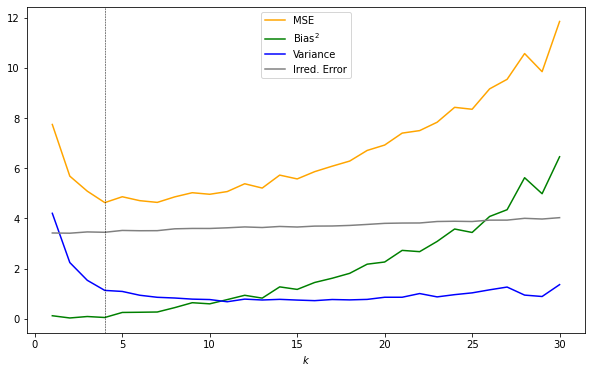

In [19]:
mse_df.plot(figsize = (10,6), xlabel = '$k$', style = {'MSE' : 'orange', 'Irred. Error' : 'grey', 'Bias$^2$' : 'g', 'Variance' : 'b'})
best_k = mse_df['MSE'].sort_values().index[0]
plt.axvline(x = best_k, color = 'black', linestyle = '--', linewidth = 0.5)

Questions to think about:

- How do the squared bias, variance and irreducible error change as $k$ increases?
- Does model complexity increase or decrease with $k$?
- Which parameter determines the irreducible error?